# Ensembles
- Bagging

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils

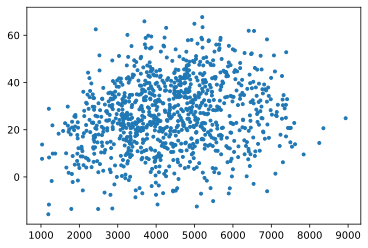

In [5]:
# gernerate non-linear data

num_samples = 1000
num_features = 20
nl_X, nl_y = utils.make_non_linear_dataset(num_samples, num_features, target_noise_sigma=10)
plt.plot(np.sum(nl_X, axis=1), nl_y, marker=".", lw=0)
plt.show()

MSE     108.887955
MAE       8.274552
R^2       0.523026
Gini      0.749919
Name: Bagging, dtype: float64

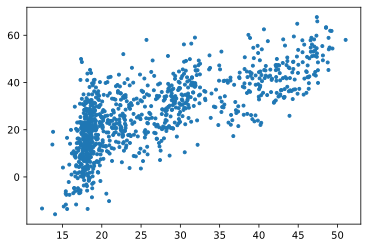

In [13]:
# train multiple trees

np.random.seed(42)

dts = []
num_trees = 50
subsample_size = int(3 * num_samples / 4)
# features_per_subsamples = int(num_features / 2)

for _ in range(num_trees):
    random_samples = np.random.choice(range(num_samples), size=subsample_size)
    subsample = nl_X[random_samples, :]
    dts.append(utils.make_trained_decision_tree(X=subsample, y=nl_y[random_samples], depth=4))
    
preds = [utils.decision_tree_predict(dt, nl_X) for dt in dts]
bagging_pred = np.mean(preds, axis=0)

plt.plot(bagging_pred, nl_y, marker=".", lw=0)

bagging_evals = utils.compute_evaluation_series(nl_y, bagging_pred, "Bagging")
bagging_evals

In [15]:
# compare with DT
# same params with DT, but Ensemble increases scores

dt = utils.make_trained_decision_tree(nl_X, nl_y, depth=4)
dt_y = utils.decision_tree_predict(dt, nl_X)
dt_evals = utils.compute_evaluation_series(nl_y, dt_y, "DT")

pd.DataFrame([dt_evals, bagging_evals]).T

,DT,Bagging
MSE,123.242489,108.887955
MAE,8.768659,8.274552
R^2,0.460147,0.523026
Gini,0.635139,0.749919


In [ ]:
# ex 2.2.X: implement subsampling not only for the samples, but also for features,
#           so that at each iteration only num_features/2 features were randomly selected from the nl_x
# ex 2.2.X: make a table showing results of ensemble for 25, 50, 75, ..., 150 trees.
#           Compare with single decision tree
# ex 2.2.X: what is better: ensemble with 100 trees with depth 3 or one decision tree with depth 4?
#           Consider different criteria, including speed of computation, accuracy, memory etc